Machine leanring
techniques to predict stress. Psychological stress is defined as “a particular
relationship between the person and the environment that is appraised by
the person as taxing or exceeding his or her resources and endangering his
or her well-being”.(Lazarus Folkman, 1984) There are 3 levels of stress -
relaxed, neutral and stressed, they correspond with 0, 1 and 2 in the
dataset.
The data comes from this paper. Wearable measurements of various
young people driving in stressing environments, e.g. rush hour, highways,
red lights, as well as a relaxation period are used. The objective is to use
readings from a Microsoft Band 2 smart watch to predict the stress levels
of the user

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree


In [255]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [256]:
# Load the csv files over here into pandas data frame
# YOUR CODE HERE
# 0.1

def load_csv(file_name):
  # Input: csv_file_name
  # Output: pandas data frame
  df = pd.read_csv(file_name)
  return df

In [257]:
df_train = load_csv("/content/drive/MyDrive/Spring_22/AInHC/a2/data_2-1.csv")
print("Number of rows and colums:", df_train.shape)
print(df_train.head(5))

Number of rows and colums: (3129, 15)
     Id          HR  interval in seconds      NNRR      AVNN      SDNN  \
0  1001  108.329447             0.668183  0.979203  0.666800  0.006600   
1  1002   91.074128             0.666800  0.979203  0.666800  0.006600   
2  1003   92.201787             0.666800  0.979203  0.666800  0.006600   
3  1004   94.776255             0.666800  0.979203  0.666800  0.006600   
4  1005         NaN             0.676691  0.978741  0.676911  0.030424   

      RMSSD     pNN50        TP  ULF       VLF        LF        HF    LF_HF  \
0  0.003200  0.005000       NaN  0.0       NaN       NaN       NaN      NaN   
1  0.003200  0.005000       NaN  0.0       NaN       NaN       NaN      NaN   
2  0.003200  0.005000       NaN  0.0       NaN       NaN       NaN      NaN   
3  0.003200  0.005000       NaN  0.0       NaN       NaN       NaN      NaN   
4  0.012999  0.027727  0.000548  0.0  0.000863  0.000292  0.000033  8.79347   

   stress  
0     0.0  
1     0.0  
2     

In [258]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   3129 non-null   int64  
 1   HR                   3020 non-null   float64
 2   interval in seconds  3129 non-null   float64
 3   NNRR                 3071 non-null   float64
 4   AVNN                 3055 non-null   float64
 5   SDNN                 3039 non-null   float64
 6   RMSSD                3129 non-null   float64
 7   pNN50                3129 non-null   float64
 8   TP                   2910 non-null   float64
 9   ULF                  3006 non-null   float64
 10  VLF                  3033 non-null   float64
 11  LF                   3033 non-null   float64
 12  HF                   3033 non-null   float64
 13  LF_HF                48 non-null     float64
 14  stress               3129 non-null   float64
dtypes: float64(14), int64(1)
memory usage:

In [259]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,3129.0,2565.000000,903.408822,1001.000000,1783.000000,2565.000000,3347.000000,4129.000000
HR,3020.0,86.361053,16.924526,15.172000,76.205333,83.305717,92.804811,357.372000
interval in seconds,3129.0,0.809254,0.109722,0.549744,0.739073,0.811056,0.890853,1.061888
NNRR,3071.0,0.975838,0.002457,0.971068,0.974164,0.975480,0.977753,0.981961
AVNN,3055.0,0.809462,0.110010,0.549970,0.739242,0.811925,0.889935,1.060160
SDNN,3039.0,0.064251,0.033905,0.006600,0.038537,0.052700,0.096019,0.171178
RMSSD,3129.0,0.030399,0.016892,0.003200,0.017058,0.025945,0.046200,0.084181
pNN50,3129.0,0.039350,0.025085,0.005000,0.030641,0.032027,0.035303,0.262143
TP,2910.0,inf,NaN,0.000037,0.014432,0.031994,0.105576,inf
ULF,3006.0,inf,NaN,0.000000,0.009644,0.027414,0.104646,inf


In [343]:
dfy_all = df_train['stress']

In [341]:
df_test_all = load_csv("/content/drive/MyDrive/Spring_22/AInHC/a2/kaggle_2.csv")
print("Number of rows and colums:", df_test_all.shape)
print(df_test_all.head(5))


Number of rows and colums: (1000, 14)
   Id         HR  interval in seconds      NNRR      AVNN      SDNN     RMSSD  \
0   0  95.135158             0.890853  0.974164  0.889935  0.096018  0.046200   
1   1  82.564200             0.628600  0.980480  0.629127  0.085506  0.040439   
2   2  90.010889             0.944939  0.972702  0.943657  0.121277  0.058594   
3   3  81.102854             0.811532  0.976090  0.811925  0.049806  0.023856   
4   4  89.572000             0.844262  0.974839  0.843826  0.050792  0.024407   

      pNN50        TP       ULF      VLF   LF   HF  LF_HF  
0  0.032778  0.105342  0.105342  0.00064  0.0  0.0    NaN  
1  0.025833  0.104875  0.104875  0.00064  0.0  0.0    NaN  
2  0.034412  0.166643  0.166643  0.00064  0.0  0.0    NaN  
3  0.030641  0.026524  0.026524  0.00064  0.0  0.0    NaN  
4  0.032027  0.025992  0.025992  0.00064  0.0  0.0    NaN  


In [261]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1000 non-null   int64  
 1   HR                   1000 non-null   float64
 2   interval in seconds  1000 non-null   float64
 3   NNRR                 1000 non-null   float64
 4   AVNN                 1000 non-null   float64
 5   SDNN                 968 non-null    float64
 6   RMSSD                1000 non-null   float64
 7   pNN50                1000 non-null   float64
 8   TP                   920 non-null    float64
 9   ULF                  951 non-null    float64
 10  VLF                  969 non-null    float64
 11  LF                   969 non-null    float64
 12  HF                   969 non-null    float64
 13  LF_HF                10 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 109.5 KB


# Part 1 - Data cleaning, normalization and missing value fillup

In [262]:
columns = ['Id','LF_HF','TP']
df_train_new = df_train.drop(columns, inplace=False, axis=1)

In [263]:
# Experiment 2
columns_2 = ['Id','LF_HF', 'NNRR', 'pNN50', 'ULF', 'VLF', 'LF', 'HF']
df_train_new_2 = df_train.drop(columns_2, inplace=False, axis=1)

In [ ]:
df_test_new  = df_test.drop(columns, inplace=False, axis=1)

In [265]:
# Experiment 2
df_test_new_2  = df_test.drop(columns_2, inplace=False, axis=1)

In [ ]:
df_train_new.count()

HR                     3020
interval in seconds    3129
NNRR                   3071
AVNN                   3055
SDNN                   3039
RMSSD                  3129
pNN50                  3129
ULF                    3006
VLF                    3033
LF                     3033
HF                     3033
stress                 3129
dtype: int64

In [267]:
# Experiment 2
df_train_new_2.count()

HR                     3020
interval in seconds    3129
AVNN                   3055
SDNN                   3039
RMSSD                  3129
TP                     2910
stress                 3129
dtype: int64

Missing values method 1
replacing NANs with mean

In [ ]:
#replacing nan with mean values
df_train_mean = df_train_new.fillna(df_train_new.mean())

In [269]:
# Experiment 2
df_train_mean_2 = df_train_new_2.fillna(df_train_new_2.mean())

In [ ]:
df_train_mean.count()

HR                     3129
interval in seconds    3129
NNRR                   3129
AVNN                   3129
SDNN                   3129
RMSSD                  3129
pNN50                  3129
ULF                    3129
VLF                    3129
LF                     3129
HF                     3129
stress                 3129
dtype: int64

dropping inf values 

In [ ]:
# Only select rows that have all finite entries.
df_train_noINF = df_train_mean[np.all(np.isfinite(df_train_mean), axis=1)]

In [270]:
# Experiment 2
df_train_noINF_2 = df_train_mean_2[np.all(np.isfinite(df_train_mean_2), axis=1)]

In [ ]:
df_train_noINF.count()

HR                     2989
interval in seconds    2989
NNRR                   2989
AVNN                   2989
SDNN                   2989
RMSSD                  2989
pNN50                  2989
ULF                    2989
VLF                    2989
LF                     2989
HF                     2989
stress                 2989
dtype: int64

In [271]:
df_train_noINF_2.count()

HR                     2893
interval in seconds    2893
AVNN                   2893
SDNN                   2893
RMSSD                  2893
TP                     2893
stress                 2893
dtype: int64

In [ ]:
# creating a copy of the saleprice
dfy = df_train_noINF['stress']

In [272]:
dfy_2 = df_train_noINF_2['stress']

In [ ]:
dfy.count()

2989

In [273]:
dfy_2.count()

2893

In [ ]:
# dropping the saleprice from train
df_train_nostress = df_train_noINF.drop('stress', inplace=False, axis=1)

In [274]:
df_train_nostress_2 = df_train_noINF_2.drop('stress', inplace=False, axis=1)

In [ ]:
df_train_nostress.count()

HR                     2989
interval in seconds    2989
NNRR                   2989
AVNN                   2989
SDNN                   2989
RMSSD                  2989
pNN50                  2989
ULF                    2989
VLF                    2989
LF                     2989
HF                     2989
dtype: int64

Standardising the dataset

In [296]:
from sklearn.preprocessing import StandardScaler

# standardising X datapoints
scaler_train = StandardScaler()
scaler_train.fit(df_train_nostress) # computes mean and std for every column, dont do for test
df_train_nostress_transformed = scaler_train.transform(df_train_nostress)

In [303]:
from sklearn.preprocessing import StandardScaler

# standardising X datapoints
scaler_train = StandardScaler()
scaler_train.fit(df_train_nostress_2) # computes mean and std for every column, dont do for test
df_train_nostress_transformed_2 = scaler_train.transform(df_train_nostress_2)

In [304]:
df_train_nostress_transformed_2

array([[ 0.03406061, -1.27697893, -1.28337141, -1.12428204, -1.23711355,
        -1.0104999 ],
       [ 0.03406061, -0.86507114, -0.87251015, -1.11020122, -0.58466287,
        -1.01103699],
       [ 0.14605869, -0.90584824, -0.9145625 , -1.00195279, -1.22245098,
        -1.00598027],
       ...,
       [ 0.03406061,  1.09148602,  1.10401552,  0.87964206,  1.04132577,
         0.51896068],
       [ 0.03406061,  1.05684417,  1.05132721,  1.5442358 ,  0.99957261,
         1.57978137],
       [ 0.03406061,  0.4448415 ,  0.41912312,  0.71866854, -0.20855376,
         0.46395501]])

In [297]:
df_train_nostress_transformed

array([[ 1.31386361, -1.31089728,  1.40778986, ..., -0.01057511,
        -0.00530564, -0.00514616],
       [ 0.28656685, -1.32354833,  1.40778986, ..., -0.01057511,
        -0.00530564, -0.00514616],
       [ 0.35370215, -1.32354833,  1.40778986, ..., -0.01057511,
        -0.00530564, -0.00514616],
       ...,
       [ 0.00597358,  1.12167741, -1.2660234 , ..., -0.2363536 ,
        -0.11858115, -0.11501658],
       [ 0.00597358,  1.08723625, -0.95714265, ..., -0.2363536 ,
        -0.11858115, -0.11501658],
       [ 0.00597358,  0.47877922, -0.38709109, ..., -0.2363536 ,
        -0.11858115, -0.11501658]])

In [298]:
# standardising Y datapoints
dfy_train = dfy.values.reshape(-1,1)
scaler_ytrain = StandardScaler()
scaler_ytrain.fit(dfy_train)
dfy_train_transformed = scaler_ytrain.transform(dfy_train ) #normalised saleprice

In [305]:
# standardising Y datapoints
dfy_train_2 = dfy_2.values.reshape(-1,1)
scaler_ytrain = StandardScaler()
scaler_ytrain.fit(dfy_train_2)
dfy_train_transformed_2 = scaler_ytrain.transform(dfy_train_2) #normalised saleprice

In [308]:
dfy_train_transformed_2

array([[-1.3856161 ],
       [-1.3856161 ],
       [-1.3856161 ],
       ...,
       [ 0.02041244],
       [ 0.02041244],
       [ 0.02041244]])

In [299]:
dfy_train_transformed

array([[-1.37029635],
       [-1.37029635],
       [-1.37029635],
       ...,
       [ 0.01952916],
       [ 0.01952916],
       [ 0.01952916]])

In [ ]:
# def missing_filler1():
#   # Take input the raw data and fillup the missing values using first algorithm.
#   # YOUR CODE HERE
#   #replacing nan with mean values
  

In [ ]:
from sklearn.impute import KNNImputer
def missing_filler2(data):
  # Take input the raw data and fillup the missing values using second algorithm.
  # YOUR CODE HERE
  for col in data.columns[:-1]:
     infData = data[col].isin([np.inf, -np.inf])
     infIndex = data[col].loc[infData]
     data = data.drop(infIndex.index)
  
  hot_deck = KNNImputer(n_neighbors=2, weights = 'uniform')
  new_data = hot_deck.fit_transform(data)
  return new_data

In [ ]:
features = df_train_nostress.columns

In [ ]:
data_hotdeck = missing_filler2(df_train_nostress)
df_hotdeck = pd.DataFrame(data_hotdeck, columns = features)
print(df_hotdeck)

              HR  interval in seconds      NNRR      AVNN      SDNN     RMSSD  \
0     108.329447             0.668183  0.979203  0.666800  0.006600  0.003200   
1      91.074128             0.666800  0.979203  0.666800  0.006600  0.003200   
2      92.201787             0.666800  0.979203  0.666800  0.006600  0.003200   
3      94.776255             0.666800  0.979203  0.666800  0.006600  0.003200   
4      86.361053             0.676691  0.978741  0.676911  0.030424  0.012999   
...          ...                  ...       ...       ...       ...       ...   
2984   86.361053             0.894274  0.974164  0.893449  0.087878  0.048848   
2985   86.361053             0.899405  0.974164  0.898719  0.073491  0.035367   
2986   86.361053             0.934106  0.972702  0.934371  0.095306  0.048829   
2987   86.361053             0.930341  0.973453  0.928689  0.116824  0.048173   
2988   86.361053             0.863826  0.974839  0.860511  0.090094  0.029174   

         pNN50       ULF   

In [ ]:
def cleaning():
  # Take all the features as input, and do any data cleaning necessary.
  # YOUR CODE HERE

In [ ]:
def normalizer(dataset):
  # Taken input the output of cleaning function, and perform data normalization independently for all the features.
  # YOUR CODE HERE

  dataNorm = ((dataset-dataset.min())/(dataset.max()-dataset.min()))
  return dataNorm

In [310]:
data_norm_3 = normalizer(df_train_nostress_transformed_2)
data_norm_3

array([[0.20803347, 0.14468554, 0.14437666, 0.15206368, 0.14661179,
        0.1575615 ],
       [0.20803347, 0.16458845, 0.16422901, 0.15274404, 0.17813746,
        0.15753555],
       [0.21344509, 0.16261815, 0.16219708, 0.15797449, 0.14732026,
        0.15777988],
       ...,
       [0.20803347, 0.25912706, 0.25973247, 0.248891  , 0.25670337,
        0.23146329],
       [0.20803347, 0.2574532 , 0.25718663, 0.28100341, 0.25468591,
        0.28272093],
       [0.20803347, 0.22788193, 0.22663925, 0.24111294, 0.19631062,
        0.22880548]])

In [ ]:
data_norm = normalizer(df_train_nostress)
data_norm.head(5)

,HR,interval in seconds,NNRR,AVNN,SDNN,RMSSD,pNN50,ULF,VLF,LF,HF
0,0.272231,0.231260,0.746810,0.228993,8.846869e-08,0.000000,0.000000,0.0,0.020673,0.005956,0.004511
1,0.221806,0.228560,0.746810,0.228993,8.846869e-08,0.000000,0.000000,0.0,0.020673,0.005956,0.004511
2,0.225102,0.228560,0.746810,0.228993,8.846869e-08,0.000000,0.000000,0.0,0.020673,0.005956,0.004511
3,0.232625,0.228560,0.746810,0.228993,8.846869e-08,0.000000,0.000000,0.0,0.020673,0.005956,0.004511
4,0.208033,0.247873,0.704397,0.248811,1.447605e-01,0.121006,0.088384,0.0,0.006257,0.474330,0.127099


In [275]:
data_norm_2 = normalizer(df_train_nostress_2)
data_norm_2.head(5)

,HR,interval in seconds,AVNN,SDNN,RMSSD,TP
4,0.208033,0.247873,0.248811,0.103705,0.080207,0.001551
7,0.208033,0.335286,0.335657,0.106608,0.212788,0.001455
23,0.213445,0.326633,0.326768,0.128926,0.083187,0.002359
24,0.236293,0.242062,0.240071,0.069911,0.078792,0.000777
25,0.234962,0.152051,0.150591,0.151382,0.074215,0.002842


In [ ]:
data_norm.count()

HR                     2989
interval in seconds    2989
NNRR                   2989
AVNN                   2989
SDNN                   2989
RMSSD                  2989
pNN50                  2989
ULF                    2989
VLF                    2989
LF                     2989
HF                     2989
dtype: int64

Correlation Matrix

In [ ]:
import matplotlib.pyplot as plt

def correlationMatrix(dataset):
  # Include an option in the function to find correlation with/without the target variable
  # Output: A heatmap plot of the correlation matrix
  # Hint: Use the definition of correlation matrix to construct one for the features at hand
  data_corr = dataset.corr()
  fig, ax = plt.subplots(figsize=(8,5))   

  data_heatmap = sns.heatmap(data_corr,vmax=1, square=True,cmap="Blues",annot=True, fmt='.1f')

  return data_corr, data_heatmap

                           HR  interval in seconds      AVNN      SDNN  \
HR                   1.000000            -0.495203 -0.493653 -0.266055   
interval in seconds -0.495203             1.000000  0.996156  0.692802   
AVNN                -0.493653             0.996156  1.000000  0.697763   
SDNN                -0.266055             0.692802  0.697763  1.000000   
RMSSD               -0.269497             0.692222  0.697345  0.978686   
TP                  -0.221662             0.631554  0.637753  0.969196   

                        RMSSD        TP  
HR                  -0.269497 -0.221662  
interval in seconds  0.692222  0.631554  
AVNN                 0.697345  0.637753  
SDNN                 0.978686  0.969196  
RMSSD                1.000000  0.945565  
TP                   0.945565  1.000000  


Text(0.5, 1.0, 'Correlation between different attributes')

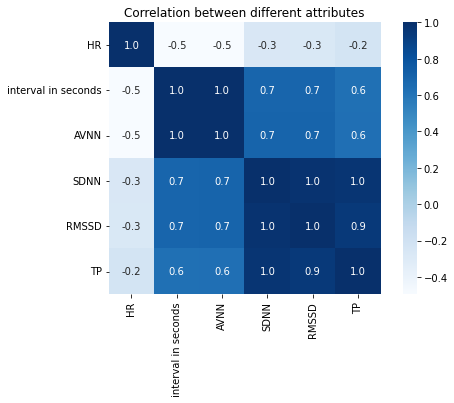

In [276]:
data_corr, data_heatmap = correlationMatrix(data_norm_2)
print(data_corr)

plt.title('Correlation between different attributes')

                           HR  interval in seconds      NNRR      AVNN  \
HR                   1.000000            -0.505839  0.493202 -0.502009   
interval in seconds -0.505839             1.000000 -0.977078  0.994034   
NNRR                 0.493202            -0.977078  1.000000 -0.969702   
AVNN                -0.502009             0.994034 -0.969702  1.000000   
SDNN                -0.294554             0.704122 -0.677959  0.704314   
RMSSD               -0.295441             0.705712 -0.682403  0.706244   
pNN50               -0.124209             0.179930 -0.182046  0.175564   
ULF                 -0.232543             0.638794 -0.605441  0.642930   
VLF                 -0.107727             0.103030 -0.107548  0.102880   
LF                   0.076125            -0.128667  0.131007 -0.129861   
HF                   0.078408            -0.123434  0.124969 -0.124519   

                         SDNN     RMSSD     pNN50       ULF       VLF  \
HR                  -0.294554 -0.29544

Text(0.5, 1.0, 'Correlation between different attributes')

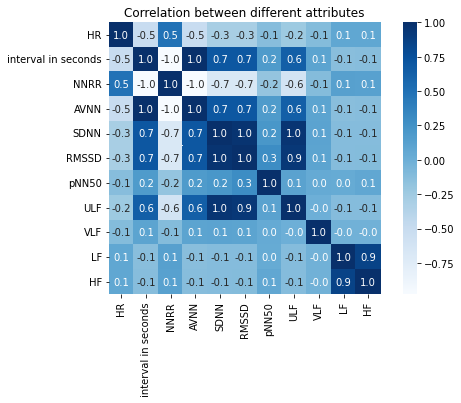

In [ ]:
data_corr, data_heatmap = correlationMatrix(data_norm)
print(data_corr)

plt.title('Correlation between different attributes')

In [ ]:
data_corr

,HR,interval in seconds,NNRR,AVNN,SDNN,RMSSD,pNN50,ULF,VLF,LF,HF
HR,1.000000,-0.505839,0.493202,-0.502009,-0.294554,-0.295441,-0.124209,-0.232543,-0.107727,0.076125,0.078408
interval in seconds,-0.505839,1.000000,-0.977078,0.994034,0.704122,0.705712,0.179930,0.638794,0.103030,-0.128667,-0.123434
NNRR,0.493202,-0.977078,1.000000,-0.969702,-0.677959,-0.682403,-0.182046,-0.605441,-0.107548,0.131007,0.124969
AVNN,-0.502009,0.994034,-0.969702,1.000000,0.704314,0.706244,0.175564,0.642930,0.102880,-0.129861,-0.124519
SDNN,-0.294554,0.704122,-0.677959,0.704314,1.000000,0.961757,0.212297,0.953956,0.107580,-0.116063,-0.113769
RMSSD,-0.295441,0.705712,-0.682403,0.706244,0.961757,1.000000,0.293969,0.934611,0.103317,-0.114382,-0.104417
pNN50,-0.124209,0.179930,-0.182046,0.175564,0.212297,0.293969,1.000000,0.119158,0.042640,0.034837,0.067359
ULF,-0.232543,0.638794,-0.605441,0.642930,0.953956,0.934611,0.119158,1.000000,-0.000943,-0.115727,-0.112248
VLF,-0.107727,0.103030,-0.107548,0.102880,0.107580,0.103317,0.042640,-0.000943,1.000000,-0.014209,-0.013545
LF,0.076125,-0.128667,0.131007,-0.129861,-0.116063,-0.114382,0.034837,-0.115727,-0.014209,1.000000,0.856257


# Part 2 - Model training and testing

In [ ]:
dfy = dfy.astype(int)

In [278]:
dfy_2 = dfy_2.astype(int)

In [314]:
dfy_2.count()

2893

In [311]:
X_3 = data_norm_3

In [315]:
y_3 = dfy_2

In [312]:
y_3 = dfy_2

In [316]:
print("*****Splitting data into Features and Target*****")
print("Number of Features :", X_3.shape)
print("Target shape :", y_3.shape)

print("\n*****Splitting data into Train and Validation*****")

X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(X_3, y_3, test_size = 0.2,random_state=42)

print("X_train :", X_train_2.shape)
print("y_train : ",y_train_2.shape)
print("X_val :", X_val_2.shape)
print("y_val :", y_val_2.shape)

*****Splitting data into Features and Target*****
Number of Features : (2893, 6)
Target shape : (2893,)

*****Splitting data into Train and Validation*****
X_train : (2314, 6)
y_train :  (2314,)
X_val : (579, 6)
y_val : (579,)


In [280]:
# Splitting the dataset into train, val and test sets.
# 2.0
X_2 = data_norm_2
y_2 = dfy_2
print("*****Splitting data into Features and Target*****")
print("Number of Features :", X.shape)
print("Target shape :", y.shape)

print("\n*****Splitting data into Train and Validation*****")

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_2, y_2, test_size = 0.2,random_state=42)

print("X_train :", X_train_2.shape)
print("y_train : ",y_train_2.shape)
print("X_val :", X_val_2.shape)
print("y_val :", y_val_2.shape)



*****Splitting data into Features and Target*****
Number of Features : (2989, 11)
Target shape : (2989,)

*****Splitting data into Train and Validation*****
X_train : (2314, 6)
y_train :  (2314,)
X_val : (579, 6)
y_val : (579,)


In [300]:
y_3 = dfy_train_transformed
X_3 = df_train_nostress_transformed

In [302]:
print("*****Splitting data into Features and Target*****")
print("Number of Features :", X_3.shape)
print("Target shape :", y_3.shape)


*****Splitting data into Features and Target*****
Number of Features : (2989, 11)
Target shape : (2989, 1)


In [ ]:
# Splitting the dataset into train, val and test sets.
# 2.0
X = data_norm
y = dfy
print("*****Splitting data into Features and Target*****")
print("Number of Features :", X.shape)
print("Target shape :", y.shape)

print("\n*****Splitting data into Train and Validation*****")

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,random_state=42)

print("X_train :", X_train.shape)
print("y_train : ",y_train.shape)
print("X_val :", X_val.shape)
print("y_val :", y_val.shape)


*****Splitting data into Features and Target*****
Number of Features : (2989, 11)
Target shape : (2989,)

*****Splitting data into Train and Validation*****
X_train : (2391, 11)
y_train :  (2391,)
X_val : (598, 11)
y_val : (598,)


Machine Learning models

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


model_linear = LinearRegression()

model_linear.fit(X_train,y_train)
y_pred_train = model_linear.predict(X_train)
y_pred_val = model_linear.predict(X_val)

# calculating the accuracies
print("Training Accuracy :",model_linear.score(X_train,y_train)*100)
print("Validation Accuracy :",model_linear.score(X_val,y_val)*100)


Training Accuracy : 11.970359020115662
Validation Accuracy : 10.172813462131147


In [ ]:
rms_train = metrics.mean_squared_error(y_train, y_pred_train, squared=False)
print("Training RMSE :", rms_train)

rms_val= metrics.mean_squared_error(y_val, y_pred_val, squared=False)
print("Validation RMSE :", rms_val)


Training RMSE : 0.675289314700885
Validation RMSE : 0.6810677347247899


# Logistic Regression

In [ ]:
# 2.1
import 
def LogisticRegression():
  # You can use the LR sci-kit learn solver but capture any other hyper-parameter settings
  # or model settings in this method
  model_lgr = LogisticRegression()
  log_preds = model_lgr.fit(X_train,y_train)
  return log_preds

In [ ]:
model_lgr = LogisticRegression()

In [ ]:
# For small datasets, ‘liblinear’ is a good choice, 
# whereas ‘sag’ and ‘saga’ are faster for large ones;
# ‘liblinear’ is limited to one-versus-rest schemes.
model_lgr.fit(X_train,y_train)
print("Logistic Regression Model coeff and intercept:\n", model_lgr.coef_, model_lgr.intercept_)

In [ ]:
model_lgr = LogisticRegression()

In [ ]:
log_preds = model_lgr.fit(X_train,y_train)

In [ ]:
print(log_preds)

In [ ]:
def LogisticRegression(solver):
  # You can use the LR sci-kit learn solver but capture any other hyper-parameter settings
  # or model settings in this method
  model_lgr = LogisticRegression(solver= 'liblinear')
  log_preds = model_lgr.fit(X_train,y_train)
  return log_preds

In [ ]:
model_lgr = LogisticRegression()
# For small datasets, ‘liblinear’ is a good choice, 
# whereas ‘sag’ and ‘saga’ are faster for large ones;
# ‘liblinear’ is limited to one-versus-rest schemes.
model_lgr.fit(X_train,y_train)
print("Logistic Regression Model coeff and intercept:\n", model_lgr.coef_, model_lgr.intercept_)

In [ ]:
y_pred = model_lgr.predict(X_val)
y_pred

array([0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0.])

In [ ]:
model_score_lgr = model_lgr.score(X_val,y_val)
print("Logistic Regression model score is {}". format(model_score_lgr))

Logistic Regression model score is 0.8448275862068966


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix_lgr = confusion_matrix(y_val, y_pred, labels=[1,0])

df_cm = pd.DataFrame(conf_matrix_lgr, index= [i for i in ['1','0']], 
                     columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True, cmap='YlGnBu')
plt.title("Confusion Matrix for Logistic Regression")

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

print("Comprehensive Classfication Report of Logistic Model on overall Dataset\n")
lgr_metrics = metrics.classification_report(y_val,y_pred,labels=[1,0])
print(lgr_metrics)

In [ ]:
#The top ten features are
model_params_lgr = model_lgr.coef_ 
print(model_params_lgr)
inc_arg_sort_lgr = np.argsort(model_params_lgr)
dec_arg_sort_lgr = inc_arg_sort_lgr[:]
print(dec_arg_sort_lgr)
top_features_lgr = data_norm.columns[dec_arg_sort_lgr[:]]
print(" Top features from Logistic Regression Model are:\n ",
      top_features_lgr)

In [ ]:
#The top ten features are after we take absolute value
model_params_lgr = model_lgr.coef_ 
abscoeff = abs(model_params_lgr )
print(abscoeff)
inc_arg_sort_lgr = np.argsort(abscoeff)
print(inc_arg_sort_lgr)
top_features_lgr = data_norm.columns[inc_arg_sort_lgr[:]]
print(top_features_lgr)

In [ ]:
# Create function which calculates F1score, precision, recall and accuracy score for true and predicted labels.
def metrics(y_pred, y_true):
  pass
  # Takes input the predicted and true labels.
  # Your code here for precision, recall, F1score, accuracy
  # You can call this code to compute metrics for your models

# SVM 

In [201]:
from sklearn.svm import SVC
clf_svm = SVC(kernel='linear')

clf_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [281]:
clf_svm_2 = SVC(kernel='linear')
clf_svm_2.fit(X_train_2, y_train_2)

SVC(kernel='linear')

In [202]:
svm_score = clf_svm.score(X_val, y_val)

In [284]:
svm_score_2 = clf_svm_2.score(X_val_2, y_val_2)

In [203]:
print("Accuracy on Validation data:", svm_score)

Accuracy on Validation data: 0.4866220735785953


In [285]:
print("Accuracy on Validation data:", svm_score_2)

Accuracy on Validation data: 0.45768566493955093


In [204]:
y_pred = clf_svm.predict(X_val)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Confusion Matrix for upport Vector Machines: 
 [[  1 156   3]
 [  0 285   4]
 [  0 144   5]]


Text(0.5, 257.44, 'Predicted label')

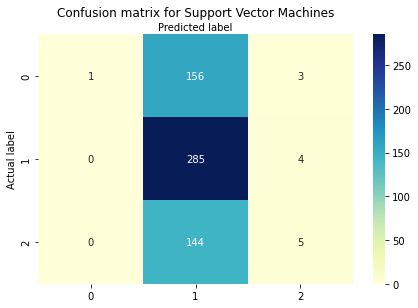

In [221]:
from sklearn.metrics import confusion_matrix
cnf_matrix_svm = confusion_matrix(y_val,y_pred)
print("Confusion Matrix for upport Vector Machines: \n", cnf_matrix_svm)

# visualize Confusion matrix
class_names=[0,1] # Name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Support Vector Machines', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [222]:
from sklearn.metrics import precision_score,recall_score,f1_score

print("Comprehensive Classfication Report of Support Vector Machines on overall Dataset\n")
lgr_metrics = metrics.classification_report(y_val,y_pred,labels=[2,1,0])
print(lgr_metrics)

Comprehensive Classfication Report of Support Vector Machines on overall Dataset

              precision    recall  f1-score   support

           2       0.42      0.03      0.06       149
           1       0.49      0.99      0.65       289
           0       1.00      0.01      0.01       160

    accuracy                           0.49       598
   macro avg       0.63      0.34      0.24       598
weighted avg       0.61      0.49      0.33       598



In [223]:
#The top ten features are
model_params_svm = clf_svm.coef_ 
print(model_params_svm)
inc_arg_sort_svm = np.argsort(model_params_svm)
dec_arg_sort_svm = inc_arg_sort_svm[:]
print(dec_arg_sort_svm)
top_features_svm = data_norm.columns[dec_arg_sort_svm[:]]
print(" \nTop features from Support Vector Machines Model are:\n ",
      top_features_svm)

[[-2.05043247e+00  2.90721496e+00  3.28628709e+00  1.85297952e+00
   9.64636317e-01 -1.11417960e+00 -1.79449396e-01 -1.07579296e+00
  -1.45957027e-01  8.39278562e-01  1.04347495e+00]
 [-5.73163978e+00  4.74776637e+00  3.27003544e+00  2.99281362e+00
   1.86199360e+00 -3.15475673e+00  4.22468655e-01 -2.43589052e+00
  -1.14766748e+00 -3.96552056e-01 -5.34081316e-01]
 [-3.52797235e-04  8.06133832e-02  1.79237545e-04 -8.01943337e-02
  -2.60338480e-03  2.93636515e-04  8.41297701e-04  2.36278271e-03
   4.01785707e-04 -1.27610835e+00 -2.34615659e+00]]
[[ 0  5  7  6  8  9  4 10  3  1  2]
 [ 0  5  7  8 10  9  6  4  3  2  1]
 [10  9  3  4  0  2  5  8  6  7  1]]
 
Top features from Support Vector Machines Model are:
  [['HR' 'RMSSD' 'ULF' 'pNN50' 'VLF' 'LF' 'SDNN' 'HF' 'AVNN'
  'interval in seconds' 'NNRR']
 ['HR' 'RMSSD' 'ULF' 'VLF' 'HF' 'LF' 'pNN50' 'SDNN' 'AVNN' 'NNRR'
  'interval in seconds']
 ['HF' 'LF' 'AVNN' 'SDNN' 'HR' 'NNRR' 'RMSSD' 'VLF' 'pNN50' 'ULF'
  'interval in seconds']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


# Decision Tree 1

In [287]:
# 2.2

  # You can use the DecisionTree sci-kit learn solver but capture any other hyper-parameter settings
  # or model settings in this method


def DecisionTree():
  classifier = DecisionTreeClassifier()
  classifier = classifier.fit(X_train, y_train)
  #return classifier
  # # predict
  y_pred_decision = classifier.predict(X_val)
  # # # predicted target is returned from DT
  return y_pred_decision


In [288]:
from sklearn.tree import DecisionTreeClassifier

classifier_2 = DecisionTreeClassifier()
clf_dt_2 = classifier_2.fit(X_train_2, y_train_2)
print(clf_dt_2.feature_importances_)
  # # predict
y_pred_decision_2 = classifier_2.predict(X_val_2)
  # # predicted target is returned from DT
print(y_pred_decision_2)


[0.3545938  0.07227498 0.07982598 0.08932782 0.05726962 0.34670781]
[1 1 1 1 0 1 0 2 1 0 1 2 1 0 0 2 0 2 0 2 1 2 2 1 0 1 2 0 2 1 1 1 2 1 1 2 1
 1 0 0 0 1 0 1 1 1 2 2 1 1 0 1 1 2 2 0 1 1 1 0 1 1 1 0 0 1 1 2 2 0 0 1 1 1
 0 0 2 1 1 1 1 0 0 0 2 0 1 2 1 1 0 0 2 1 1 1 0 0 1 1 2 1 1 2 1 0 2 1 0 2 0
 1 1 0 2 2 1 1 0 0 2 0 0 1 1 2 2 2 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 1 1 0 0 1
 0 0 1 2 1 1 0 1 1 0 2 0 2 0 2 1 0 0 0 1 2 0 1 1 2 1 0 1 1 1 1 0 1 1 2 1 0
 2 1 2 1 1 1 1 1 0 1 0 1 2 2 0 0 0 2 1 0 0 0 2 2 0 1 0 1 1 1 1 0 0 0 1 2 0
 0 1 1 2 1 1 0 2 1 0 1 2 2 1 2 1 1 0 1 1 0 2 1 1 2 0 0 0 0 1 1 1 2 0 0 0 0
 0 2 2 1 1 1 2 0 1 2 1 2 1 2 1 1 0 1 1 1 1 2 2 1 0 1 0 0 2 2 2 2 2 1 1 0 1
 0 0 1 1 2 2 0 0 1 1 1 1 2 0 0 2 0 1 2 0 1 1 2 1 0 2 0 0 2 1 1 1 0 0 0 2 2
 1 1 2 1 1 2 1 1 1 1 1 1 1 2 0 1 1 0 2 2 0 1 1 2 2 2 2 1 1 2 1 2 2 1 1 1 0
 1 2 1 2 0 2 0 0 1 1 1 0 2 1 1 1 0 2 2 1 0 1 1 2 0 0 0 1 2 1 2 1 1 1 0 2 2
 1 2 1 2 2 1 1 0 2 2 0 2 1 2 1 2 1 1 0 0 2 1 2 2 2 1 2 2 1 0 2 1 0 1 1 1 1
 0 1 0 0 1 1 1 2 1 0 2 0 1 0 2 2

In [215]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
clf_dt = classifier.fit(X_train, y_train)
print(clf_dt.feature_importances_)
  # # predict
y_pred_decision = classifier.predict(X_val)
  # # predicted target is returned from DT
print(y_pred_decision)


[0.34085894 0.0914328  0.02401946 0.06917694 0.06617837 0.03848135
 0.02866898 0.31780185 0.02338131 0.         0.        ]
[2 0 2 2 0 0 1 1 1 2 1 1 1 0 1 2 2 0 0 0 2 2 1 2 1 2 1 1 2 1 2 1 0 1 1 1 2
 2 2 2 1 1 2 0 1 0 0 0 1 2 1 1 0 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2
 1 1 2 1 0 0 0 0 2 0 1 2 1 0 0 2 2 0 1 1 2 0 1 1 2 2 0 0 1 2 0 1 0 2 0 0 1
 2 0 1 0 0 1 0 0 1 1 1 1 2 2 1 1 2 0 1 1 0 0 1 2 1 0 1 2 0 1 2 0 0 0 1 1 1
 1 1 1 0 0 2 0 1 1 0 1 2 1 1 2 2 1 0 1 1 1 1 1 2 0 2 1 1 1 1 1 1 0 2 2 0 1
 0 1 0 1 1 1 2 1 0 1 1 1 1 0 2 1 0 1 2 2 0 1 1 2 0 1 0 2 2 0 0 2 0 2 0 1 2
 1 1 1 0 1 0 0 2 1 2 0 2 1 2 0 1 0 2 2 1 1 2 2 1 0 2 2 1 0 1 0 1 1 0 1 0 0
 0 2 0 0 1 1 0 0 1 1 1 2 2 1 2 2 1 1 1 2 1 1 1 1 2 2 2 2 1 1 1 0 0 2 2 0 0
 2 1 1 1 0 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 2 1 2 1 2 2 2 1 1 1 2 1 2 1 0 1
 2 0 2 2 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 2 0 2 1 0 1 2 0 0 1 0 0 1 1 1 1 1 1
 0 0 0 0 2 2 1 1 0 0 1 1 2 0 1 1 1 0 0 1 2 0 2 1 1 2 0 2 0 0 0 2 1 0 1 1 1
 1 1 1 0 0 1 2 1 0 1 1 1 1 1 2 0 0 1 1 1 2 0 0 0 2 

In [216]:
3 # predicted target is returned from DT
DecisionTree() 

array([2, 0, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0,
       1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 2, 2, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0,
       1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0,
       0, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2,
       0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0,
       1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1,
       1, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1,

Confusion Matrix for Decision Tree: 
 [[ 97  48  15]
 [ 56 163  70]
 [ 23  61  65]]


Text(0.5, 257.44, 'Predicted label')

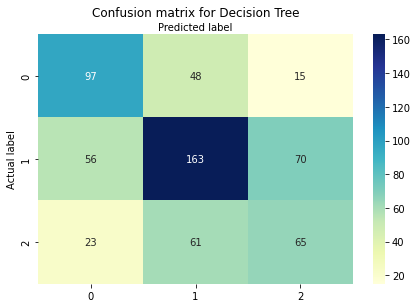

In [217]:
from sklearn.metrics import confusion_matrix
cnf_matrix_dt = confusion_matrix(y_val, DecisionTree())
print("Confusion Matrix for Decision Tree: \n", cnf_matrix_dt)

# visualize Confusion matrix
class_names=[0,1] # Name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dt), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [224]:
dt_accuracy = metrics.accuracy_score(y_val,DecisionTree())
print("Accuracy of Decision Tree:", dt_accuracy)

Accuracy of Decision Tree: 0.540133779264214


In [290]:
dt_accuracy_2 = metrics.accuracy_score(y_val_2,y_pred_decision_2)
print("Accuracy of Decision Tree:", dt_accuracy_2)

Accuracy of Decision Tree: 0.5146804835924007


In [225]:
print("Comprehensive Report of the Decision Tree Model On overall Dataset\n")
dt_metrics = metrics.classification_report(y_val, DecisionTree())
print(dt_metrics)

Comprehensive Report of the Decision Tree Model On overall Dataset

              precision    recall  f1-score   support

           0       0.57      0.62      0.59       160
           1       0.60      0.56      0.58       289
           2       0.43      0.44      0.43       149

    accuracy                           0.55       598
   macro avg       0.53      0.54      0.53       598
weighted avg       0.55      0.55      0.55       598



In [ ]:
#feature_cols = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']

In [ ]:
#Display the decision tree as a graph
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('STRESS.png')
Image(graph.create_png())

In [226]:
clf_dt.predict_proba(X_train)
clf_dt.predict_proba(X_train)
clf_dt.predict(X_train)

#clf_dt.predict_proba([[1,1, 5, 1.5]])'


array([2, 1, 1, ..., 1, 1, 1])

In [227]:
#Feature important order
feature_names = X.columns.values
columns = X.columns
coefficients = clf_dt.feature_importances_.reshape(X.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('DecisionTreeClassifier - Feature Importance:')
print('\n',fullList,'\n')

DecisionTreeClassifier - Feature Importance:

                Variable  absCoefficient
0                    HR        0.340859
7                   ULF        0.317802
1   interval in seconds        0.091433
3                  AVNN        0.069177
4                  SDNN        0.066178
5                 RMSSD        0.038481
6                 pNN50        0.028669
2                  NNRR        0.024019
8                   VLF        0.023381
9                    LF        0.000000
10                   HF        0.000000 



#PCA

In [228]:
from sklearn.decomposition import PCA

pca = PCA(3)
X_pca = pca.fit_transform(X_train)

In [229]:
print(pca.explained_variance_ratio_)

[0.76932255 0.13744686 0.03287581]


#Random Forest

In [349]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [350]:
rfc_1 = RandomForestClassifier()
rfc_1.fit(data_hotdeck,dfy)

RandomForestClassifier()

In [232]:
y_preds_rfc = rfc.predict(X_val)
acc_rfc = accuracy_score(y_preds_rfc,y_val)
acc_rfc

0.596989966555184

In [351]:
y_preds_rfc_1 = rfc_1.predict(X_val)
acc_rfc_1 = accuracy_score(y_preds_rfc_1,y_val)
acc_rfc_1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.48327759197324416

rfc_2 with 6 features only 

In [291]:
from sklearn.ensemble import RandomForestClassifier
rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train_2, y_train_2)

RandomForestClassifier()

In [295]:
y_preds_rfc_2 = rfc_2.predict(X_val_2)
acc_rfc_2 = accuracy_score(y_preds_rfc_2,y_val_2)
acc_rfc_2

0.5889464594127807

rfc_3 after standardisng the data

In [317]:
rfc_3 = RandomForestClassifier()
rfc_3.fit(X_train_3, y_train_3)

y_preds_rfc_3 = rfc_3.predict(X_val_3)
acc_rfc_3 = accuracy_score(y_preds_rfc_3,y_val_3)
acc_rfc_3

0.5613126079447323

metrics using standard scalar dataset

In [356]:
print("Comprehensive Report of the Random forest Model with standard scalar \n")
rfc_metrics_3 = metrics.classification_report(y_val_3, y_preds_rfc_3)
print(rfc_metrics_3)

Comprehensive Report of the Random forest Model with standard scalar 

              precision    recall  f1-score   support

           0       0.74      0.56      0.64       183
           1       0.55      0.66      0.60       265
           2       0.39      0.37      0.38       131

    accuracy                           0.56       579
   macro avg       0.56      0.53      0.54       579
weighted avg       0.57      0.56      0.56       579



metrics for hotdeck RFC

In [354]:
print("Comprehensive Report of the Random forest Model On overall Dataset\n")
rfc_metrics_1 = metrics.classification_report(y_val, y_preds_rfc_1)
print(rfc_metrics_1)

Comprehensive Report of the Random forest Model On overall Dataset

              precision    recall  f1-score   support

           0       0.50      0.01      0.01       160
           1       0.48      1.00      0.65       289
           2       0.00      0.00      0.00       149

    accuracy                           0.48       598
   macro avg       0.33      0.33      0.22       598
weighted avg       0.37      0.48      0.32       598



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


metrics for best RFC

In [337]:
print("Comprehensive Report of the Random forest Model On overall Dataset\n")
rfc_metrics = metrics.classification_report(y_val, y_preds_rfc)
print(rfc_metrics)

Comprehensive Report of the Random forest Model On overall Dataset

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       160
           1       0.62      0.65      0.63       289
           2       0.48      0.42      0.45       149

    accuracy                           0.60       598
   macro avg       0.58      0.58      0.58       598
weighted avg       0.59      0.60      0.59       598



In [328]:
#Feature important order
feature_names = X_2.columns.values
columns = X_2.columns
coefficients_2 = rfc_2.feature_importances_.reshape(X_2.columns.shape[0], 1)
absCoefficients_2= abs(coefficients_2)
fullList_2 = pd.concat((pd.DataFrame(columns, columns = ['Features']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('Random forest - Feature Importance:')
print('\n',fullList_2,'\n')

Random forest - Feature Importance:

                Features  absCoefficient
0                    HR        0.340859
7                   NaN        0.317802
1   interval in seconds        0.091433
3                  SDNN        0.069177
4                 RMSSD        0.066178
5                    TP        0.038481
6                   NaN        0.028669
2                  AVNN        0.024019
8                   NaN        0.023381
9                   NaN        0.000000
10                  NaN        0.000000 



Confusion Matrix for random forest: 
 [[104  65  14]
 [ 27 187  51]
 [  6  75  50]]


Text(0.5, 257.44, 'Predicted label')

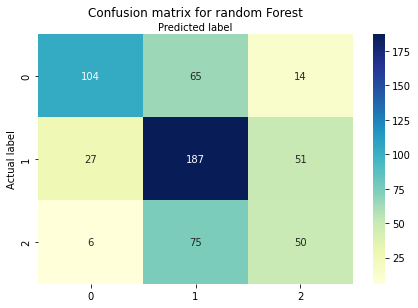

In [331]:
from sklearn.metrics import confusion_matrix
cnf_matrix_rfc = confusion_matrix(y_val_2, y_preds_rfc_2)
print("Confusion Matrix for random forest: \n", cnf_matrix_rfc)

# visualize Confusion matrix
class_names=[0,1,2] # Name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rfc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Part 3 - Interpretability

top features already implemented above

In [ ]:
# Look into using suitable functions from sklearn. Explain your code and findings clearly in the report document.
# 3.1
def FeatureImportance():
  # Your code can based on measures of information gain or other feature selection methods
  # Input: k - Number of features to pick
  # Output should be a ranked list of features
  # YOUR CODE HERE


In [339]:
def FeatureImportanceForPairs(Features, X_train,X_test,y_train, y_test):
  # Find the best pairs of features which are useful for making the prediction.
  # HINT: Can be done in a model agnostic way through pair generation and ranking.
  # YOUR CODE HERE
  best_pair = []
  counter = 0
  for i in range(len(Features)):
    feat_one = Features[i]
    for j in range(i+1,len(Features)):
      two_feats = Features[j]
      #rfc_2 = RandomForestClassifier()
      #rfc_2.fit(X_train_2, y_train_2)
      model = rfc_2(X_train[ [Features[i].Features[j] ]],y_train)
      y_pred = model.predict(X_test[[Features[i],Features[j]]])
      if accuracy_score(y_test,y_pred) > counter:
                        best_pair = [[Features[i],Features[j]]]
                        counter = accuracy_score(y_test_y_pred)
  print('Best pair features is:',best_pair, "accuracy is:",counter)



In [ ]:
Features = fullList_2['Features'].values.tolist()[:5]
FeatureImportanceForPairs(Features,X_train_2, X_val_2, y_train_2, y_val_2)
# X_train_2, X_val_2, y_train_2, y_val_2

# TESTING

In [235]:
df_test.head(5)

,Id,HR,interval in seconds,NNRR,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF
0,0,95.135158,0.890853,0.974164,0.889935,0.096018,0.046200,0.032778,0.105342,0.105342,0.00064,0.0,0.0,NaN
1,1,82.564200,0.628600,0.980480,0.629127,0.085506,0.040439,0.025833,0.104875,0.104875,0.00064,0.0,0.0,NaN
2,2,90.010889,0.944939,0.972702,0.943657,0.121277,0.058594,0.034412,0.166643,0.166643,0.00064,0.0,0.0,NaN
3,3,81.102854,0.811532,0.976090,0.811925,0.049806,0.023856,0.030641,0.026524,0.026524,0.00064,0.0,0.0,NaN
4,4,89.572000,0.844262,0.974839,0.843826,0.050792,0.024407,0.032027,0.025992,0.025992,0.00064,0.0,0.0,NaN


In [236]:
test_file_index = df_test.iloc[:,0].copy()


In [238]:
df_test_new.head(2)

,HR,interval in seconds,NNRR,AVNN,SDNN,RMSSD,pNN50,ULF,VLF,LF,HF
0,95.135158,0.890853,0.974164,0.889935,0.096018,0.046200,0.032778,0.105342,0.00064,0.0,0.0
1,82.564200,0.628600,0.980480,0.629127,0.085506,0.040439,0.025833,0.104875,0.00064,0.0,0.0


In [239]:
#test_dataf =((data-data.min())/(data.max()-data.min()))
testdata_norm = ((df_test_new-df_test_new.min())/(df_test_new.max()-df_test_new.min()))
testdata_norm.head(5)

,HR,interval in seconds,NNRR,AVNN,SDNN,RMSSD,pNN50,ULF,VLF,LF,HF
0,0.159962,0.666040,0.284219,0.666350,0.543320,0.538152,0.108025,0.0,0.0,0.0,0.0
1,0.122279,0.153972,0.864041,0.155152,0.479447,0.466053,0.081018,0.0,0.0,0.0,0.0
2,0.144601,0.771647,0.150005,0.771648,0.696794,0.693265,0.114379,0.0,0.0,0.0,0.0
3,0.117898,0.511160,0.461030,0.513446,0.262527,0.258519,0.099715,0.0,0.0,0.0,0.0
4,0.143285,0.575067,0.346186,0.575974,0.268514,0.265415,0.105105,0.0,0.0,0.0,0.0


In [242]:
#replacing nan with mean values
df_test_mean = testdata_norm.fillna(testdata_norm.mean())

In [243]:
df_test_mean.count()

HR                     1000
interval in seconds    1000
NNRR                   1000
AVNN                   1000
SDNN                   1000
RMSSD                  1000
pNN50                  1000
ULF                    1000
VLF                    1000
LF                     1000
HF                     1000
dtype: int64

dropping inf values 

In [244]:
# Only select rows that have all finite entries.
df_test_noINF = df_test_mean[np.all(np.isfinite(df_test_mean), axis=1)]

In [245]:
df_test_noINF.count()

HR                     1000
interval in seconds    1000
NNRR                   1000
AVNN                   1000
SDNN                   1000
RMSSD                  1000
pNN50                  1000
ULF                    1000
VLF                    1000
LF                     1000
HF                     1000
dtype: int64

In [250]:
#test_feature = X.columns
y_pred_test = rfc.predict(df_test_noINF)
predictions  = [float(i) for i in y_pred_test]
#y_pred_test = map(int, y_pred_test)
#print(y_pred_test)
#predictions = y_pred_test.tolist()

In [251]:
print(predictions)

[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 2.0, 2.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, 0.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 0.0, 2.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 2.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0,

In [252]:
import csv
from google.colab import files

predfilename = 'eval_stress_rfc.csv'
with open(predfilename, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["Id", "stress"])
    writer.writerows(zip(test_file_index, predictions))
files.download(predfilename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>